# KNN 
<!--<badge>--><a href="https://colab.research.google.com/github/mthd98/Machine-Learning-from-Zero-to-Hero-Bootcamp-v1/blob/main/Week 03 - Machine Learning Algorithms/3- More_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->

KNN is a non-parametric and lazy learning algorithm. Non-parametric means there is no assumption for underlying data distribution. In other words, the model structure determined from the dataset. This will be very helpful in practice where most of the real-world datasets do not follow mathematical theoretical assumptions.


In [1]:
import numpy as np
import pandas as pd

# using 'from * import ...' allows as to import submodules directly
from sklearn import (
    datasets,
    model_selection,
    linear_model,
    metrics,
    neighbors,
    tree,
    ensemble,
    preprocessing
)

# alternatively, we can import the whole package as such
import sklearn

Alternatively, can  load a dataset into x & y directly (i.e. into input/output pairs) by setting the `return_X_y` parameter to `True`

In [ ]:
x, y = datasets.load_iris(return_X_y=True)  # load the iris dataset

x_normalize = preprocessing.StandardScaler()
x_norm = x_normalize.fit_transform(x)
x.shape, y.shape

((150, 4), (150,))

Second, we split the data into 90/10 training/testing split (90% of the data will be used for training while 10% will be used for testing)

In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x_norm, y, test_size=0.1, random_state=42, stratify=y
)

In [ ]:
eigh = neighbors.KNeighborsClassifier(
    n_neighbors=3
)  # initialize the knn model with 3 n_neighbors
eigh.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
y_pred = eigh.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9333333333333333


# Tree

## Decision Tree
### Decision Tree Algorithm
 
Decision Tree algorithm belongs to the family of supervised learning algorithms. Unlike other supervised learning algorithms, the decision tree algorithm can be used for solving regression and classification problems too.

The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data).

In Decision Trees, for predicting a class label for a record we start from the root of the tree. We compare the values of the root attribute with the record’s attribute. On the basis of comparison, we follow the branch corresponding to that value and jump to the next node.

 

###Types of Decision Trees
 
Types of decision trees are based on the type of target variable we have. It can be of two types:

1. Categorical Variable Decision Tree: Decision Tree which has a categorical target variable then it called a Categorical variable decision tree.

2. Continuous Variable Decision Tree: Decision Tree has a continuous target variable then it is called Continuous Variable Decision Tree.

In [ ]:
x, y = datasets.load_iris(return_X_y=True)  # import the dataset form sklearn


x.shape, y.shape

((150, 4), (150,))

Second, we split the data into 90/10 training/testing split (90% of the data will be used for training while 10% will be used for testing)

In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x, y, test_size=0.1, random_state=42, stratify=y
)

In [ ]:
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(248.0, 553.6666666666666, 'X[2] <= 2.45\ngini = 0.667\nsamples = 135\nvalue = [45, 45, 45]'),
 Text(186.0, 453.0, 'gini = 0.0\nsamples = 45\nvalue = [45, 0, 0]'),
 Text(310.0, 453.0, 'X[3] <= 1.65\ngini = 0.5\nsamples = 90\nvalue = [0, 45, 45]'),
 Text(124.0, 352.3333333333333, 'X[2] <= 4.95\ngini = 0.12\nsamples = 47\nvalue = [0, 44, 3]'),
 Text(62.0, 251.66666666666663, 'gini = 0.0\nsamples = 43\nvalue = [0, 43, 0]'),
 Text(186.0, 251.66666666666663, 'X[3] <= 1.55\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(124.0, 151.0, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(248.0, 151.0, 'X[2] <= 5.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(186.0, 50.33333333333326, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(310.0, 50.33333333333326, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(496.0, 352.3333333333333, 'X[2] <= 4.85\ngini = 0.045\nsamples = 43\nvalue = [0, 1, 42]'),
 Text(434.0, 251.66666666666663, 'X[1] <= 3.1\ngini = 0.375\nsamples = 

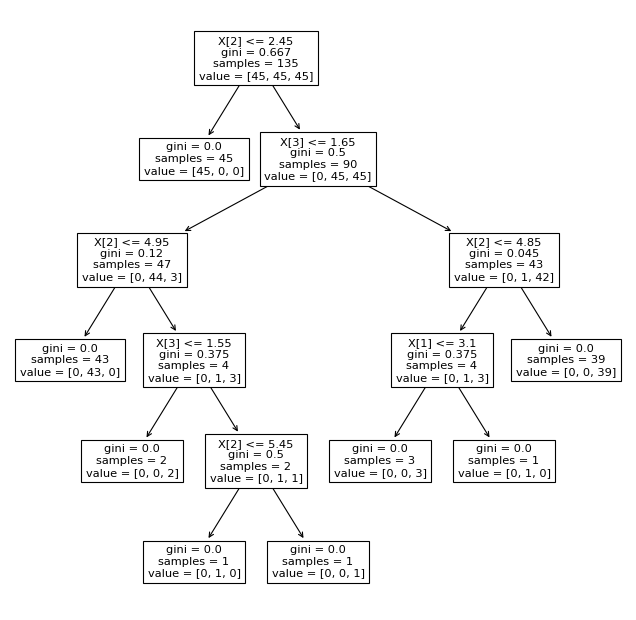

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10), dpi=80)
tree.plot_tree(clf)

In [ ]:
y_pred = clf.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9333333333333333


## Random Forest
Random forest is a supervised machine learning algorithm that is commonly used to solve classification and regression problems. It generates decision trees from several samples, using the majority vote for classification and the average for regression.

One of the most important characteristics of the Random Forest Algorithm is that it can manage data sets with both continuous and categorical variables, as in classification and regression problems. For classification problems, it produces superior results.

### How Random Forest Work

For example:  consider the fruit basket as the data as shown in the figure below. Now n number of samples are taken from the fruit basket and an individual decision tree is constructed for each sample. Each decision tree will generate an output as shown in the figure. The final output is considered based on majority voting. In the below figure you can see that the majority decision tree gives output as an apple when compared to a banana, so the final output is taken as an apple.

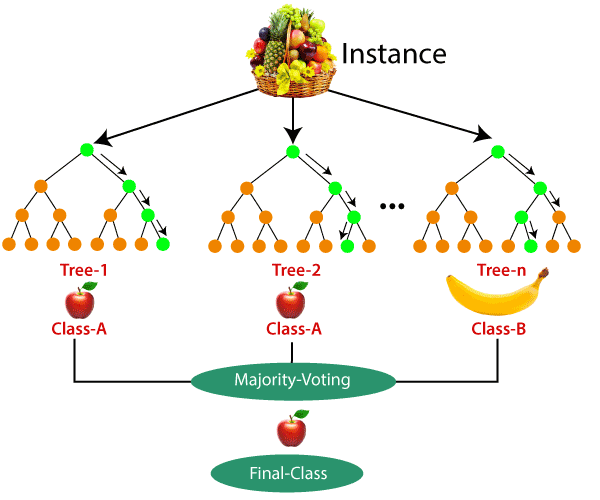

### Difference Between Decision Tree & Random Forest

Random forest is a collection of decision trees; still, there are a lot of differences in their behavior.

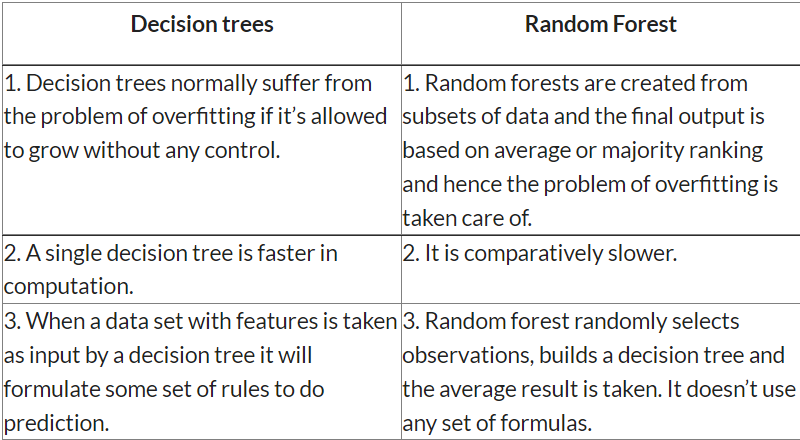


### Let's Create & Train Random Forest

In [ ]:
x, y = datasets.load_iris(return_X_y=True)  # import the dataset form sklearn

x.shape, y.shape

((150, 4), (150,))

Second, we split the data into 90/10 training/testing split (90% of the data will be used for training while 10% will be used for testing)

In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x, y, test_size=0.1, random_state=42, stratify=y
)

### Important Hyperparameters

**n_estimatorsint:** the number of trees in the forest.

**max_depthint:** the maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**oob_scorebool:** whether to use out-of-bag samples to estimate the generalization score. Only available if bootstrap=True.

**n_jobs:** it tells the engine how many processors it is allowed to use. If the value is 1, it can use only one processor but if the value is -1 there is no limit.


In [ ]:
clf = ensemble.RandomForestClassifier(
    random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True
)
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = clf.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9333333333333333
